# get financial data

## yahoo_finによる情報表示

- [yahoo_fin](http://theautomatic.net/yahoo_fin-documentation/#installation)

```bash
$ pip install yahoo_fin
```

## references

- [HOW TO DOWNLOAD FUNDAMENTALS DATA WITH PYTHON](http://theautomatic.net/2020/05/05/how-to-download-fundamentals-data-with-python/)

In [285]:
import yahoo_fin.stock_info as si
import pandas as pd
import seaborn as sns

In [205]:
def get_ticker_data(ticker):
    data_qt = si.get_quote_table(ticker)
    data_val=si.get_stats_valuation(ticker)

    df_qt=pd.DataFrame.from_dict(data_qt, orient='index')\
        .reset_index()\
        .rename(columns={"index":"info",0:"values"})
    df_val=data_val.rename(columns={0:"info",1:"values"})
    df=pd.concat([df_qt,df_val], ignore_index=True).sort_values(by="info")
    df["Ticker"]=ticker
    return(df)

def get_tickers_data(tickers):

    data = pd.DataFrame(index=[],columns=["Ticker","info","values"])

    for ticker in tickers:
        tmp=get_ticker_data(ticker)
        data=data.append(tmp, ignore_index=True)
    
    df=data.pivot(index="Ticker",columns="info",values="values")
    
    return(df)

In [286]:
def show_infos(df,table=False):

    def col_name(df,str):
        return([col for col in df.columns if str in col])

    PSR=col_name(df,"Price/Sales")
    PBR=col_name(df,"Price/Book")
    PER=col_name(df,"PE Ratio")
    EPS=col_name(df,"EPS")
    Target=col_name(df,"Target")
    Date=col_name(df,"Earnings Date")
    Dividend=col_name(df,"Dividend")
    Price=col_name(df,"Close")

    numeric=Price+Target+PSR+PER+PBR+EPS
    df[numeric]=df[numeric].astype("float")
    
    target=Price+Target+PSR+PER+PBR+EPS+Dividend+Date

    df_dow[PSR].plot(kind="hist",bins=20)
    
    output=df[target].sort_values(by=PSR, ascending=False)
    if table==True:
        display(output)
    else:
        display(output.top())

    
    return(output)

In [270]:
# get ticker list
tickers_dow = si.tickers_dow()
tickers_nasdaq=si.tickers_nasdaq()
tickers_sp500=si.tickers_sp500()
tickers_other=si.tickers_other()

## Get data! It takes a while, so please be patient!

In [275]:
# get Dow data
df_dow=get_tickers_data(tickers=tickers_dow)

In [287]:
# get nasdaq data
df_nasdaq=get_tickers_data(tickers=tickers_nasdaq)

IndexError: list index out of range

In [ ]:
# get sp500 data
df_sp500=get_tickers_data(tickers=tickers_sp500)

## Now, it's time to enjoy!

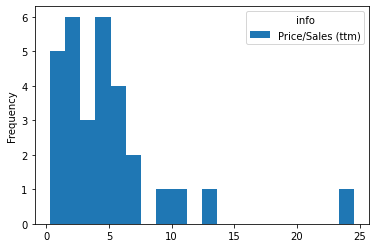

In [284]:
# show data
df_dow_final=show_infos(df_dow,table=False)
ax=sns.violinplot(x=df_dow_final[PSR])

## Get stock info of your favorite

In [248]:

fangam=["FB","AAPL","NFLX","GOOG","AMZN","MSFT"]
tickers_tech=fangam+["ADBE","NVDA","TSLA","SQ","DOCU","OKTA","U","ZM","FVRR","ABNB"]

df_tech=get_tickers_data(tickers=tech_tickers)
show_infos(df_tech)

info,Previous Close,1y Target Est,Price/Sales (ttm),PE Ratio (TTM),Price/Book (mrq),EPS (TTM),Ex-Dividend Date,Forward Dividend & Yield,Earnings Date
Ticker,,,,,,,,,
FB,345.65,386.47,10.53,30.02,7.45,11.67,NaN,N/A (N/A),"Jul 28, 2021"
MSFT,277.42,298.92,13.09,37.88,15.57,7.34,"Aug 18, 2021",2.24 (0.80%),"Jul 27, 2021"
TSLA,652.81,655.12,17.61,658.27,27.49,1.0,NaN,N/A (N/A),"Jul 20, 2021 - Jul 26, 2021"
ADBE,605.95,618.99,20.01,52.39,20.82,11.54,"Mar 24, 2005",N/A (N/A),"Sep 21, 2021"
NVDA,796.11,757.31,25.95,94.8,26.61,8.46,"Jun 09, 2021",0.64 (0.08%),"Aug 17, 2021 - Aug 23, 2021"
ABNB,142.53,172.5,26.99,NaN,NaN,NaN,NaN,N/A (N/A),"May 13, 2021"
DOCU,288.74,281.17,34.53,NaN,230.60,-1.08,NaN,N/A (N/A),"Sep 01, 2021 - Sep 06, 2021"
ZM,386.01,415.48,34.60,132.79,27.05,2.9,NaN,N/A (N/A),"Aug 30, 2021 - Sep 03, 2021"
U,105.18,123.05,35.43,NaN,NaN,NaN,NaN,N/A (N/A),"Aug 10, 2021"


In [249]:
health_tickers=["BMY","BNTX","BIIB","MRNA","PGNY","PFE","VEEV"]
health_df=get_tickers_data(tickers=health_tickers)

show_infos(health_df)

info,Previous Close,1y Target Est,Price/Sales (ttm),PE Ratio (TTM),Price/Book (mrq),EPS (TTM),Ex-Dividend Date,Forward Dividend & Yield,Earnings Date
Ticker,,,,,,,,,
PGNY,60.05,66.33,13.50,NaN,NaN,-0.99,NaN,N/A (N/A),"Aug 03, 2021 - Aug 09, 2021"
BNTX,207.93,196.84,20.98,NaN,NaN,NaN,NaN,N/A (N/A),"Aug 09, 2021"
BMY,66.69,75.37,3.50,NaN,3.99,-2.76,"Jul 01, 2021",1.96 (2.94%),"Jul 28, 2021"
VEEV,320.4,333.14,31.23,127.04,20.09,2.53,NaN,N/A (N/A),"Aug 25, 2021 - Aug 30, 2021"
MRNA,232.79,184.92,34.33,156.04,24.32,1.49,NaN,N/A (N/A),"Aug 03, 2021 - Aug 09, 2021"
BIIB,369.05,404.34,4.28,18.57,5.05,19.29,NaN,N/A (N/A),"Jul 20, 2021 - Jul 26, 2021"
PFE,39.25,42.97,4.78,20.07,3.23,1.97,"Jul 29, 2021",1.56 (3.93%),"Jul 28, 2021"


## available info
1y Target Est
52 Week Range
Ask
Avg. Volume
Beta (5Y Monthly)
Bid
Day's Range
EPS (TTM)
Earnings Date
Enterprise Value 3
Enterprise Value/EBITDA 7
Enterprise Value/Revenue 3
Ex-Dividend Date
Forward Dividend & Yield
Forward P/E 1
Market Cap
Market Cap (intraday) 5
Open
PE Ratio (TTM)
PEG Ratio (5 yr expected) 1
Previous Close
Price/Book (mrq)
Price/Sales (ttm)
Quote Price
Trailing P/E
Volume

## Pyfolioによる情報表示

- [pyfolio](https://github.com/quantopian/pyfolio)

```bash
$ pip install pyfolio
```

## references

- [HOW TO DOWNLOAD FUNDAMENTALS DATA WITH PYTHON](http://theautomatic.net/2020/05/05/how-to-download-fundamentals-data-with-python/)
- [pyfolioを使ってみる](https://qiita.com/mrsn28/items/445553c24861b9930682)

In [213]:
import pyfolio as pf
%matplotlib inline

# silence warnings
import warnings
warnings.filterwarnings('ignore')

/Users/jun/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [214]:
stock_rets = pf.utils.get_symbol_rets('DOCU')
#pf.create_returns_tear_sheet(stock_rets, live_start_date='2015-12-1')
pf.create_returns_tear_sheet(stock_rets)

AttributeError: module 'pandas_datareader.data' has no attribute 'get_data_google'